In [1]:
#------ manually fix import for now
import sys
sys.path.append('../src/')
#------
import numpy as np
import matplotlib.pyplot as plt
import glob
from astropy.io import fits
from redcross.read import read_giano
from redcross.datacube import Datacube
from redcross.cross_correlation import Template
from redcross.align import Align, WaveSolution


c = 2.99e5
%load_ext autoreload
%autoreload 2

In [53]:
night = '1'
position = 'B'
data_dir = '/home/dario/AstronomyLeiden/MRP/wasp189/data/giano/night{:}/pos{:}/'.format(night, position)

dc = Datacube().load(data_dir+'datacube_input_pos{:}.npy'.format(position))

Loading Datacube from... /home/dario/AstronomyLeiden/MRP/wasp189/data/giano/night1/posB/datacube_input_posB.npy


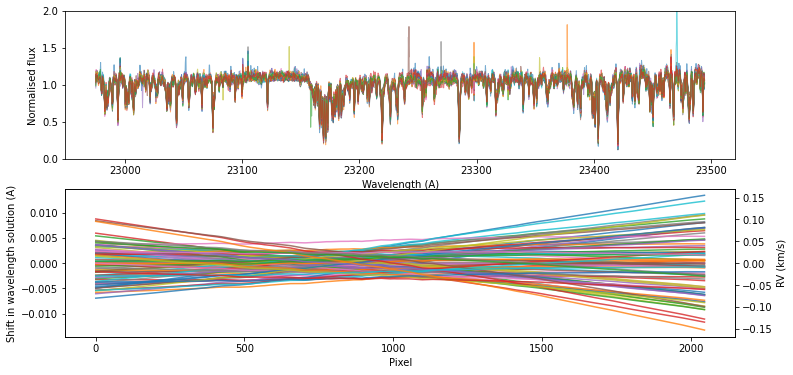

In [54]:
order = 48

fig, ax = plt.subplots(2,1,figsize=(12,6))
dco = dc.order(order).remove_continuum()
master = Template(wlt=np.median(dco.wlt, axis=0), flux=np.median(dco.flux, axis=0))

rv = np.zeros((dco.nObs, 2))
for f in range(dco.nObs):
    diff = dco.wlt[f,]-master.wlt
    rel_diff = c*diff / master.wlt
    rv[f,] = [rel_diff.min(), rel_diff.max()]
    ax[0].plot(dco.wlt[f,], dco.flux[f,], alpha=0.6, lw=1.)
    ax[1].plot(diff, alpha=0.8)
    
ax[0].set(xlabel='Wavelength (A)', ylabel='Normalised flux', ylim=(0,2))
ax[1].set(xlabel='Pixel', ylabel='Shift in wavelength solution (A)')


ax_copy = ax[1].twinx()
ax_copy.set(ylabel='RV (km/s)', ylim=[rv.min(), rv.max()])
    
plt.show()